In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install xlrd
!pip install openpyxl

In [3]:
df = pd.read_csv("data/answers_clean_complete.csv")
df = df.drop('Unnamed: 0', axis=1)
df = df.iloc[2:].reset_index(drop=True)

In [4]:
count_all = df.shape[0]
print(df['testing'].value_counts() * 100 / count_all)
print(df['testing'].value_counts())
print('No answer:', df['testing'].isna().sum())

Yes              87.473461
No                9.978769
I don't know.     2.547771
Name: testing, dtype: float64
Yes              412
No                47
I don't know.     12
Name: testing, dtype: int64
No answer: 0


In [5]:
contributors = df['role'] == 'Source code contributor'
maintainers = df['role'] != 'Source code contributor'
count_contributors = df[contributors].shape[0]
count_maintainers = df[maintainers].shape[0]

In [6]:
print(df[contributors]['testing'].value_counts())
print('No answer:', df[contributors]['testing'].isna().sum())

Yes              155
No                22
I don't know.     10
Name: testing, dtype: int64
No answer: 0


In [7]:
print(df[maintainers]['testing'].value_counts())
print('No answer:', df[maintainers]['testing'].isna().sum())

Yes              257
No                25
I don't know.      2
Name: testing, dtype: int64
No answer: 0


In [8]:
print(df[contributors]['testing'].value_counts() * 100 / count_contributors)
print(df[contributors]['testing'].value_counts())
print('-----')
print(df[maintainers]['testing'].value_counts() * 100 / count_maintainers)
print(df[maintainers]['testing'].value_counts())

Yes              82.887701
No               11.764706
I don't know.     5.347594
Name: testing, dtype: float64
Yes              155
No                22
I don't know.     10
Name: testing, dtype: int64
-----
Yes              90.492958
No                8.802817
I don't know.     0.704225
Name: testing, dtype: float64
Yes              257
No                25
I don't know.      2
Name: testing, dtype: int64


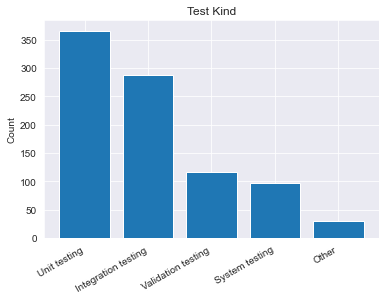

Number of not-answered: 72
Number of answered: 399


In [9]:
test_kinds = ['Unit testing', 'Integration testing', 'Validation testing', 'System testing', 'Other']
counts = [df.test_kind_unit.sum(), df.test_kind_integration.sum(), df.test_kind_validation.sum(), df.test_kind_system.sum(), df.test_kind_other.sum()]
fig, ax = plt.subplots()
ax.bar(test_kinds, counts)
ax.set_ylabel('Count')
ax.set_title('Test Kind')
plt.xticks(rotation=30, ha='right')
plt.show()
print("Number of not-answered:", df.test_kind.isna().sum())
print("Number of answered:", df.shape[0] - df.test_kind.isna().sum())

In [10]:
print(df['test_kind'].isna().sum() * 100 / count_all)
print('No answer:', df['test_kind'].isna().sum())
print(df[contributors]['test_kind'].isna().sum() * 100 / count_contributors)
print(df[contributors]['test_kind'].isna().sum())
print('-----')
print(df[maintainers]['test_kind'].isna().sum() * 100 / count_maintainers)
print(df[maintainers]['test_kind'].isna().sum())

15.286624203821656
No answer: 72
21.925133689839573
41
-----
10.915492957746478
31


In [11]:
print(df['test_kind_unit'].sum() * 100 / 399)
print(df['test_kind_integration'].sum() * 100 / 399)
print(df['test_kind_validation'].sum() * 100 / 399)
print(df['test_kind_system'].sum() * 100 / 399)
print(df['test_kind_other'].sum() * 100 / 399)

91.72932330827068
71.9298245614035
29.32330827067669
24.31077694235589
7.518796992481203


In [12]:
print(df[~df['test_kind_text'].isna()]['test_kind_text'].shape[0])
print(df[~df['test_kind_text'].isna()]['test_kind_text'].shape[0] * 100 / 399)

30
7.518796992481203


In [13]:
df[df["test_kind"].str.contains("Other", na=False)][['test_kind_text']].to_csv("manual_data_inspection/test_kind_text.csv")

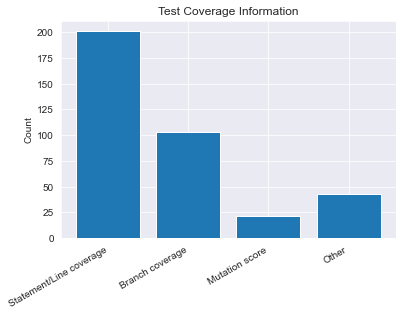

Number of not-answered: 222
Number of answered: 249


In [14]:
tc_kinds = ['Statement/Line coverage', 'Branch coverage', 'Mutation score', 'Other']
counts = [df.tc_kind_line.sum(), df.tc_kind_branch.sum(), df.tc_kind_mutation.sum(), df.tc_kind_other.sum()]
fig, ax = plt.subplots()
ax.bar(tc_kinds, counts)
ax.set_ylabel('Count')
ax.set_title('Test Coverage Information')
plt.xticks(rotation=30, ha='right')
plt.show()
print("Number of not-answered:", df.test_coverage_kind.isna().sum())
print("Number of answered:", df.shape[0] - df.test_coverage_kind.isna().sum())

In [15]:
print(df['tc_kind_line'].sum())
print(df['tc_kind_branch'].sum())
print(df['tc_kind_mutation'].sum())
print(df['tc_kind_other'].sum())
print()
print(df['tc_kind_line'].sum() * 100 / 249)
print(df['tc_kind_branch'].sum() * 100 / 249)
print(df['tc_kind_mutation'].sum() * 100 / 249)
print(df['tc_kind_other'].sum() * 100 / 249)

201
103
22
43

80.72289156626506
41.36546184738956
8.835341365461847
17.269076305220885


In [16]:
print(df['test_coverage_kind'].isna().sum() * 100 / count_all)
print('No answer:', df['test_coverage_kind'].isna().sum())
print(df[contributors]['test_coverage_kind'].isna().sum() * 100 / count_contributors)
print(df[contributors]['test_coverage_kind'].isna().sum())
print('-----')
print(df[maintainers]['test_coverage_kind'].isna().sum() * 100 / count_maintainers)
print(df[maintainers]['test_coverage_kind'].isna().sum())

47.13375796178344
No answer: 222
53.475935828877006
100
-----
42.95774647887324
122


In [17]:
print(df[contributors]['test_coverage_kind'].isna().sum())
print(count_contributors - df[contributors]['test_coverage_kind'].isna().sum())
print('-----')
print(df[maintainers]['test_coverage_kind'].isna().sum())
print(count_maintainers - df[maintainers]['test_coverage_kind'].isna().sum())

100
87
-----
122
162


In [18]:
print(df[~df['test_coverage_kind_text'].isna()]['test_coverage_kind_text'].shape[0])
print(df[~df['test_coverage_kind_text'].isna()]['test_coverage_kind_text'].shape[0] * 100 / 249) 

40
16.06425702811245


In [19]:
df[df["test_coverage_kind"].str.contains("Other", na=False)][['test_coverage_kind_text']].to_csv("manual_data_inspection/test_coverage_kind_text.csv")

No, this information is not on the GitHub page of the project.                                               204
Yes, I know. (Please specify in the text box below)                                                          124
No, but I can find this information somewhere on project's GitHub. (Please specify in the text box below)     52
Name: code_coverage_aware, dtype: int64
Number of not-answered: 91
Number of answered: 380


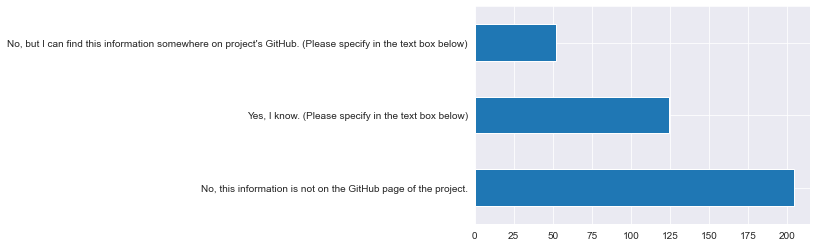

In [20]:
code_coverage_aware_series = df.code_coverage_aware.value_counts()
code_coverage_aware_series.plot.barh()
print(code_coverage_aware_series)
print("Number of not-answered:", df.code_coverage_aware.isna().sum())
print("Number of answered:", df.shape[0] - df.code_coverage_aware.isna().sum())

In [21]:
print(df[contributors]['code_coverage_aware'].isna().sum())
print(count_contributors - df[contributors]['code_coverage_aware'].isna().sum())
print(df[contributors].code_coverage_aware.value_counts())
print('-----')
print(df[maintainers]['code_coverage_aware'].isna().sum())
print(count_maintainers - df[maintainers]['code_coverage_aware'].isna().sum())
print(df[maintainers].code_coverage_aware.value_counts())

50
137
No, this information is not on the GitHub page of the project.                                               81
No, but I can find this information somewhere on project's GitHub. (Please specify in the text box below)    32
Yes, I know. (Please specify in the text box below)                                                          24
Name: code_coverage_aware, dtype: int64
-----
41
243
No, this information is not on the GitHub page of the project.                                               123
Yes, I know. (Please specify in the text box below)                                                          100
No, but I can find this information somewhere on project's GitHub. (Please specify in the text box below)     20
Name: code_coverage_aware, dtype: int64


In [22]:
print('No info:', df.code_coverage_aware.value_counts()['No, this information is not on the GitHub page of the project.'])
print(df.code_coverage_aware[contributors].value_counts()['No, this information is not on the GitHub page of the project.'] * 100 / count_contributors)
print(df.code_coverage_aware[contributors].value_counts()['No, this information is not on the GitHub page of the project.'])
print('-----')
print(df.code_coverage_aware[maintainers].value_counts()['No, this information is not on the GitHub page of the project.'] * 100 / count_maintainers)
print(df.code_coverage_aware[maintainers].value_counts()['No, this information is not on the GitHub page of the project.'])

No info: 204
43.31550802139037
81
-----
43.309859154929576
123


In [23]:
print(df['code_coverage_aware'].isna().sum() * 100 / count_all)
print('No answer:', df['code_coverage_aware'].isna().sum())
print(df[contributors]['code_coverage_aware'].isna().sum() * 100 / count_contributors)
print(df[contributors]['code_coverage_aware'].isna().sum())
print('-----')
print(df[maintainers]['code_coverage_aware'].isna().sum() * 100 / count_maintainers)
print(df[maintainers]['code_coverage_aware'].isna().sum())

print()
print(204 * 100 / 380)
print(124 * 100 / 380)
print(52 * 100 / 380)

19.32059447983015
No answer: 91
26.737967914438503
50
-----
14.43661971830986
41

53.68421052631579
32.63157894736842
13.68421052631579


In [24]:
df[df["code_coverage_aware"].str.contains("Yes, I know.", na=False)][['code_coverage_amount']].to_csv("manual_data_inspection/code_coverage_amount.csv")
df[df["code_coverage_aware"].str.contains("find this information somewhere", na=False)][['code_coverage_location']].to_csv("manual_data_inspection/code_coverage_location.csv")

In [25]:
print('No answer:', df['test_tooling'].isna().sum())
print((df['test_tooling'].isna().sum()) * 100 / count_all)
print('Answer:', count_all - df['test_tooling'].isna().sum() )
print((count_all - df['test_tooling'].isna().sum()) * 100 / count_all)
print('-----')
print('Contributors:')
print(df[contributors]['test_tooling'].isna().sum() * 100 / count_contributors)
print(df[contributors]['test_tooling'].isna().sum())
print('-----')
print('Maintainers:')
print(df[maintainers]['test_tooling'].isna().sum() * 100 / count_maintainers)
print(df[maintainers]['test_tooling'].isna().sum())

No answer: 123
26.11464968152866
Answer: 348
73.88535031847134
-----
Contributors:
39.037433155080215
73
-----
Maintainers:
17.6056338028169
50


In [26]:
print(df[contributors]['test_tooling'].isna().sum())
print(count_contributors - df[contributors]['test_tooling'].isna().sum())
# print(df[contributors].test_tooling.value_counts())
print('-----')
print(df[maintainers]['test_tooling'].isna().sum())
print(count_maintainers - df[maintainers]['test_tooling'].isna().sum())
# print(df[maintainers].test_tooling.value_counts())

73
114
-----
50
234


In [27]:
# invalid_indexes = [158, 398, 408, 430, 458]
# df.loc[invalid_indexes]

In [28]:
df[~df["test_tooling"].isna()][['test_tooling']].to_csv("manual_data_inspection/test_tooling.csv")

In [29]:
df_test_tooling = pd.read_excel("manual_data_inspection/test_tooling_coding.xlsx")
print(df_test_tooling.shape[0])
print(df_test_tooling.columns)

348
Index(['Column1', 'test_tooling', 'count', 'notes', 't1', 't2', 't3', 't4',
       't5', 't6', 't7', 't8', 't9', 't10', 't11', 't12', 't13', 't14', 't15'],
      dtype='object')


1.0     143
2.0      95
3.0      50
4.0      38
5.0      10
6.0       1
7.0       1
8.0       1
9.0       1
10.0      1
15.0      1
Name: count, dtype: int64


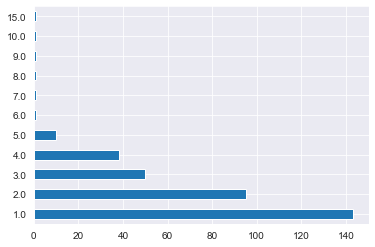

In [30]:
count_series = df_test_tooling['count'].value_counts().sort_index()
count_series.plot.barh()
print(count_series)

In [31]:
print(df_test_tooling['count'].describe())

count    342.000000
mean       2.163743
std        1.517088
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       15.000000
Name: count, dtype: float64


In [32]:
df_test_tooling.shape[0]

348

In [33]:
df_test_tooling[df_test_tooling['t1'].isna()]

,Column1,test_tooling,count,notes,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15
121,158,I don't,NaN,unrelated answer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292,398,frameworks,NaN,unrelated answer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,408,"libraries, mainly what the language provides",NaN,unrelated answer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
317,430,the testing framework that comes with the web ...,NaN,unrelated answer/not accurate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,458,None,NaN,unrelated answer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
tooling_dict = df_test_tooling[['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10', 't11', 't12', 't13', 't14', 't15']].apply(pd.Series.value_counts).sum(1).sort_values().to_dict()

In [35]:
sum = 0
count = 0
for x in list(tooling_dict)[-20:]:
    print(x)
    sum+=tooling_dict[x]
    count+=1
    print(tooling_dict[x], 100*tooling_dict[x]/734)
print(sum)
print(count)

cypress
7.0 0.9536784741144414
jenkins
7.0 0.9536784741144414
playwright
8.0 1.0899182561307903
coverage.py
8.0 1.0899182561307903
xunit
8.0 1.0899182561307903
coveralls
9.0 1.2261580381471389
googletest
10.0 1.3623978201634876
unittest
11.0 1.4986376021798364
scripts
12.0 1.6348773841961852
rspec
12.0 1.6348773841961852
codecov
15.0 2.043596730245232
jest
19.0 2.5885558583106265
rust-test
20.0 2.7247956403269753
custom
22.0 2.997275204359673
cargo
24.0 3.2697547683923704
junit
26.0 3.542234332425068
go-test
30.0 4.087193460490464
gha
35.0 4.768392370572207
phpunit
35.0 4.768392370572207
pytest
50.0 6.8119891008174385
368.0
20


In [36]:
sum_others = 0
count = 0
for x in list(tooling_dict)[:-20]:
    print(x)
    sum_others+=tooling_dict[x]
    count+=1
    print(tooling_dict[x], 100*tooling_dict[x]/734)
print(sum_others)
print(count)

llvm-cov
1.0 0.1362397820163488
nuget
1.0 0.1362397820163488
nuke
1.0 0.1362397820163488
ounit
1.0 0.1362397820163488
pdepend
1.0 0.1362397820163488
pep8
1.0 0.1362397820163488
phantomjs
1.0 0.1362397820163488
php-codesnifer
1.0 0.1362397820163488
phpbench
1.0 0.1362397820163488
phpbenchmark
1.0 0.1362397820163488
phpcpd
1.0 0.1362397820163488
phpcsfixer
1.0 0.1362397820163488
phploc
1.0 0.1362397820163488
phpspec
1.0 0.1362397820163488
pre-commit
1.0 0.1362397820163488
prometheus
1.0 0.1362397820163488
promtool
1.0 0.1362397820163488
prow
1.0 0.1362397820163488
publicapigenerator
1.0 0.1362397820163488
puppeteer
1.0 0.1362397820163488
pyenv
1.0 0.1362397820163488
pytest-cov
1.0 0.1362397820163488
pytest-plugins
1.0 0.1362397820163488
pytest-vcr
1.0 0.1362397820163488
nosetests
1.0 0.1362397820163488
nodejs
1.0 0.1362397820163488
nock
1.0 0.1362397820163488
nix
1.0 0.1362397820163488
karate
1.0 0.1362397820163488
knative-test
1.0 0.1362397820163488
kover
1.0 0.1362397820163488
kuttl
1.